Python provides a variety of libraries for convenient manipulation of frequently used computational and graphing tasks. The main libraries used in “Macroeconomic forecasting with Python” are as follows:


*   numpy: provides basic computational processes and mathematical functions
*   scipy: provides functions for performing somewhat advanced scientific computations
*   pandas: provides functions to transform, analyze and manage data
*   matplotlib: provides functions to draw different types of graphs
*   statsmodels: provides functions for statistical processing
*   scikit-learn: provides functions for machine learning


These libraries are updated with new versions as functions are expanded or bugs are fixed. Updating these libraries with the following code.


    !pip install -U pip
    !pip install -U numpy
    !pip install -U scipy
    !pip install -U pandas
    !pip install -U matplotlib
    !pip install -U statsmodels
    !pip install -U scikit-learn

In [1]:
#Install the necessary library
!pip install -U statsmodels
#The library below is for displaying japanese in matplotlib.
#!pip install japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 10.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 4.7 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: pip install --upgrade pip


When programming with Python, import the libraries first.


In [2]:
#Code 1.1
import math

import numpy as np
import pandas as pd
import scipy as sp
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
from matplotlib.pylab import rcParams
rcParams["figure.figsize"] = 15, 6
#import japanize_matplotlib

In [ ]:
# Mount Google Drive to read files in Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Next, load the data. The data to be loaded this time is the GDP gap published by the Cabinet Office and stored in an Excel file named "data_1_eng.xlsx". Figure 1.1 can be created by executing the following code and plotting the GDP gap.

     Quarter  the GDP gap
0    1980.01         -0.6
1    1980.02         -2.2
2    1980.03         -1.1
3    1980.04          0.0
4    1981.01         -0.2
..       ...          ...
160  2020.01         -2.5
161  2020.02        -10.5
162  2020.03         -5.8
163  2020.04         -3.3
164  2021.01         -4.7

[165 rows x 2 columns]


Text(0, 0.5, '％')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 65285 (\N{FULLWIDTH PERCENT SIGN}) missing from current font.
  func(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65285 (\N{FULLWIDTH PERCENT SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


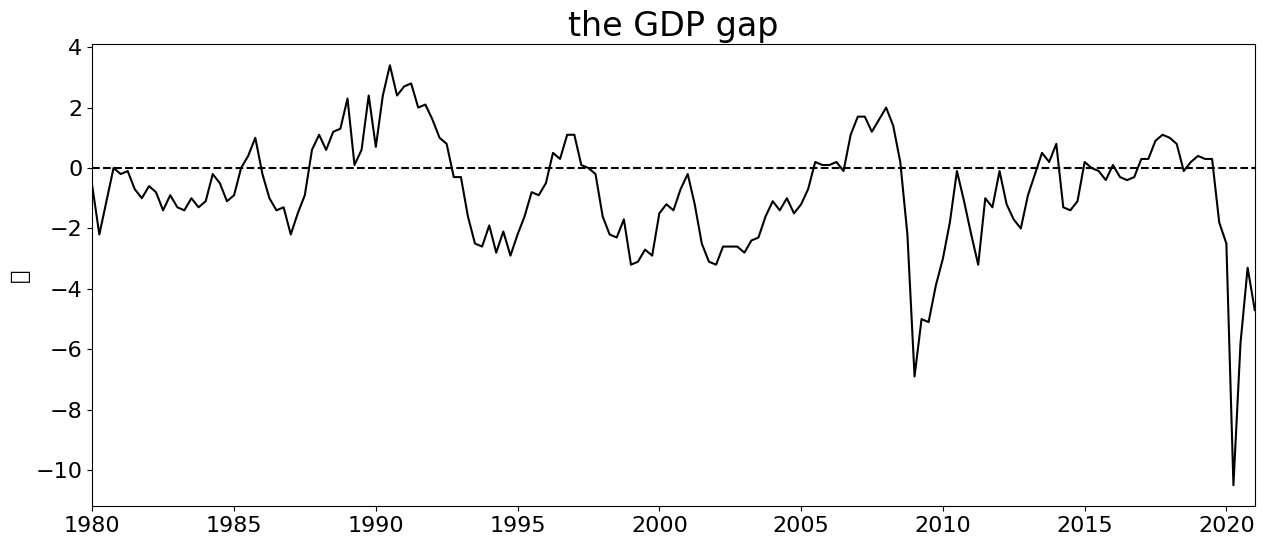

In [4]:
# Code 1.2
# Load the data
gap = pd.read_excel("/content/drive/My Drive/data_1_eng.xlsx", sheet_name="GDP gap(cabinet)", header=[0])
dlen = len(gap)
caogap = gap.iloc[0:dlen, 1]
dti = pd.date_range("1980-01-01", periods=dlen, freq="QS")
# Output data
print(gap)

# Draw the graph
plt.title("the GDP gap", fontsize=24)
plt.plot(dti, caogap, color="black")
plt.hlines([0], dti[0], dti[-1], color="black", linestyles="dashed")
plt.tick_params(labelsize=16)
plt.xlim(dti[0], dti[-1])
plt.ylabel("％", fontsize=16)

Equation (1.3) in Section 1.1, which is the result of the AR(1) model estimation of the GDP gap, can be computed with the following code.

In [5]:
# Code 1.3
# Estimation of AR(1) model
model = sm.tsa.AutoReg(caogap, lags=1)
result = model.fit()
print(result.summary())

                            AutoReg Model Results                             
Dep. Variable:            the GDP gap   No. Observations:                  165
Model:                     AutoReg(1)   Log Likelihood                -250.353
Method:               Conditional MLE   S.D. of innovations              1.114
Date:                Sat, 15 Oct 2022   AIC                            506.705
Time:                        22:12:23   BIC                            516.005
Sample:                             1   HQIC                           510.481
                                  165                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1708      0.094     -1.811      0.070      -0.356       0.014
the GDP gap.L1     0.8094      0.048     16.970      0.000       0.716       0.903
                                    

Table 1.2, the correlogram of the GDP gap, can be computed with the following code.

/var/folders/v2/qnyptv01769_67q119kq30hh0000gn/T/ipykernel_1427/2209793317.py:6: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  lbound, ubound = sp.stats.norm.interval(alpha=CONFIDENCE_LEVEL, loc=0, scale=1)


Text(0.5, 0, 'Lag order')

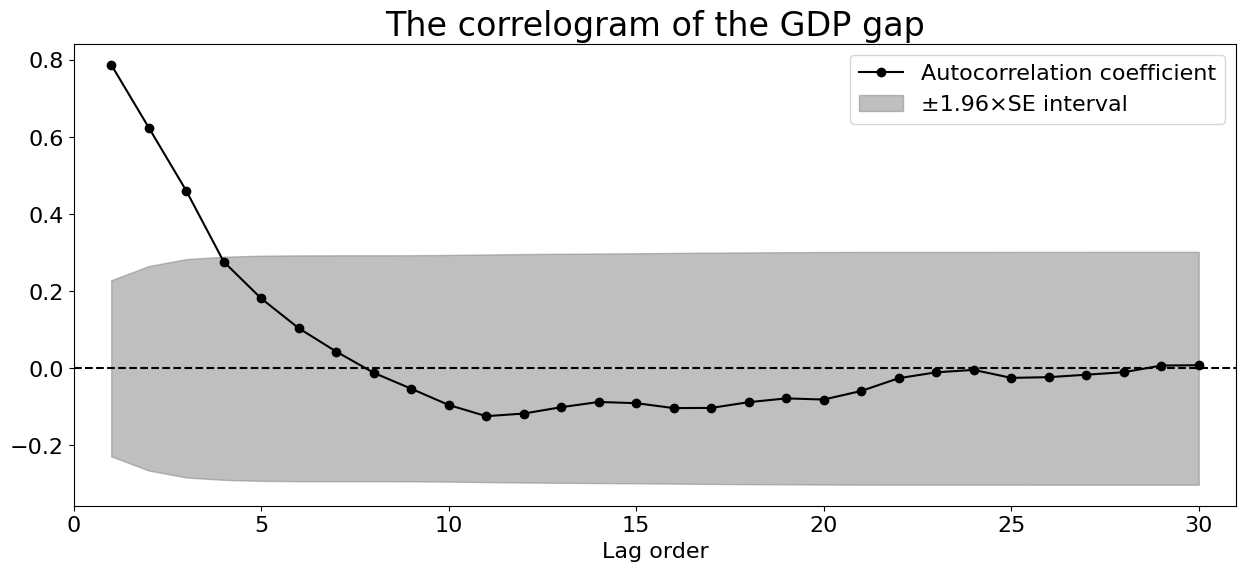

In [7]:
# Code 1.4
# Calculation of the correlogram
H = 30  # Lag order（30 quarters）
CONFIDENCE_LEVEL = 0.95  # Significance level
autoc, se = np.zeros(H), np.zeros(H)
lbound, ubound = sp.stats.norm.interval(alpha=CONFIDENCE_LEVEL, loc=0, scale=1)
for i in range(1, H + 1):
    x, y = pd.DataFrame(caogap[i:].to_numpy()), pd.DataFrame(caogap[:-i].to_numpy())
    model = LinearRegression()
    result = model.fit(x, y)
    autoc[i - 1] = result.coef_
    se[i - 1] = (
        1 / len(caogap) * (1 + 2 * sum([autoc[x] ** 2 for x in range(i)]))
    ) ** (1 / 2)

# Draw the graph
hlabel = pd.DataFrame(range(1, H + 1))
plt.title("The correlogram of the GDP gap", fontsize=24)
plt.plot(np.ravel(hlabel), autoc, color="black", label="Autocorrelation coefficient", marker="o")
plt.hlines([0], 0, H + 1, color="black", linestyles="dashed")
plt.fill_between(
    np.ravel(hlabel), ubound * se, lbound * se, color="grey", alpha=0.5, label="±1.96×SE interval"
)
plt.legend(loc="upper right", fontsize=16)
plt.tick_params(labelsize=16)
plt.xlim(0, H + 1)
plt.xlabel("Lag order", fontsize=16)

The Q-test and the modified Q-test in Table 1.1 can be calculated with the following code

In [8]:
# Code 1.5
# Q-test, modified Q-test
LAG = 8  # Lag orders（8 quarters）
rho_lag, q_bp, q_lb, crit = np.zeros(LAG), np.zeros(LAG), np.zeros(LAG), np.zeros(LAG)
for i in range(1, LAG + 1):
    data_x, data_y = pd.DataFrame(caogap[: dlen - i]), pd.DataFrame(caogap[i:])
    model_lag = LinearRegression(fit_intercept=True)
    model_lag.fit(data_x, data_y)
    rho_lag[i - 1] = model_lag.coef_
    # Q-test statistic
    q_bp[i - 1] = dlen * sum(rho_lag**2)
    # modified Q-test statistic
    q_lb[i - 1] = dlen * (dlen + 2) * sum(rho_lag**2 / (dlen - i))
    # critical value of chi-square distribution
    crit[i - 1] = sp.stats.chi2.ppf(q=0.95, df=i)
# Creat the results table
df_table = pd.DataFrame(
    [rho_lag, q_bp, q_lb, crit],
    columns=[f"lag={i+1}" for i in range(LAG)],
    index=["correlation coefficient", "Q_BP", "Q_LB", "critical value"],
)
print(df_table)

                              lag=1       lag=2       lag=3       lag=4  \
correlation coefficient    0.809377    0.647305    0.501310    0.369914   
Q_BP                     108.090157  177.225805  218.692172  241.270209   
Q_LB                     110.067416  181.574905  225.441930  250.261645   
critical value             3.841459    5.991465    7.814728    9.487729   

                              lag=5       lag=6       lag=7       lag=8  
correlation coefficient    0.244137    0.140524    0.058660   -0.015943  
Q_BP                     251.104717  254.362991  254.930746  254.972688  
Q_LB                     262.090549  267.161129  269.452118  271.212986  
critical value            11.070498   12.591587   14.067140   15.507313  


The iterated forecast of the AR(1) model shown in Figure 1.3 can be calculated by the following code. Note that the lag order of the AR model can be adjusted by changing the value of "L" in the code.

/var/folders/v2/qnyptv01769_67q119kq30hh0000gn/T/ipykernel_1427/2903576283.py:10: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  lbound, ubound = sp.stats.norm.interval(alpha=CONFIDENCE_LEVEL, loc=0, scale=1)


Text(0, 0.5, '%')

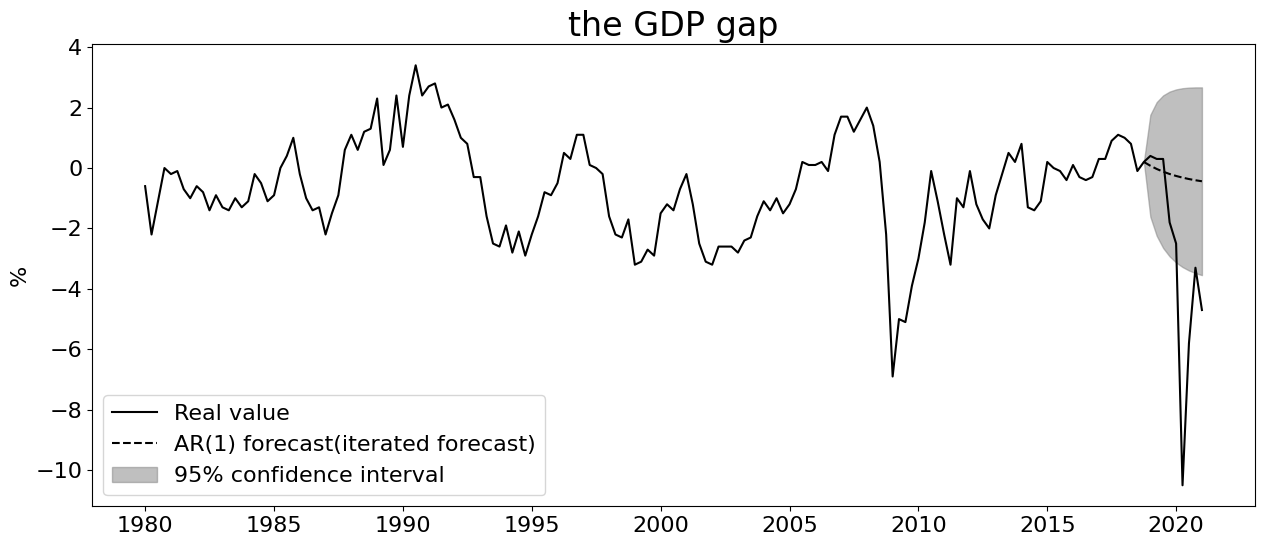

In [12]:
# Code 1.6
# Forecast and forecast error by AR(1) model (iterated forecast)
L = 1  # Lag order of AR model（A quarter）
MAX_H = 9  # Maximum forecast horizon（9 quarters）
CONFIDENCE_LEVEL = 0.95  # Confidence coefficient

# Estimate the AR model using data from 1980 to 2018
dti = pd.date_range("1980-01-01", periods=dlen, freq="QS")
ssize = sum(dti.year < 2019)
lbound, ubound = sp.stats.norm.interval(alpha=CONFIDENCE_LEVEL, loc=0, scale=1)
predict_result, conf_result = np.zeros(MAX_H), np.zeros(MAX_H)
for h in range(MAX_H):
    for l in range(1, L + 1):
        train_x, train_y = pd.DataFrame(), pd.DataFrame(caogap[L : ssize])
        test_x = pd.DataFrame()
        for ll in range(1, l + 1):
            train_x_lagged = pd.DataFrame(
                caogap[L - ll : L - ll + len(train_y)].to_numpy()
            )
            train_x = pd.concat([train_x, train_x_lagged], axis=1)
        for ll in range(1, l + 1):
            test_x_lagged = pd.DataFrame(
                caogap[
                    ssize + l - ll - (l - 1) - 1 : ssize + l - ll - (l - 1)
                ].to_numpy()
            )
            test_x = pd.concat([test_x, test_x_lagged], axis=1)
    # Estimate the AR model
    model = LinearRegression()
    model.fit(train_x, train_y)
    # Calculate the predicted value
    for _ in range(h + 1):
        y_hat = model.predict(train_x)
        forecast = pd.DataFrame(
            np.sum((test_x * model.coef_).to_numpy()) + model.intercept_
        )
        test_x = pd.concat(
            [forecast, pd.DataFrame((test_x.T[:-1]).T.to_numpy())], axis=1
        )
    predict_result[h] = forecast.to_numpy()
    # Calculate the confidence coefficient of prediction interval
    se = np.std(train_y.to_numpy() - y_hat)
    bmat = np.zeros((L, L))
    bmat[0, :] = model.coef_
    for i in range(1, L):
        bmat[i, i - 1] = 1
    smat = np.zeros((L, L))
    smat[0, 0] = 1
    cvec = np.zeros((1, L))
    cvec[:, 0] = 1
    coef = sum(
        cvec
        @ np.linalg.matrix_power(bmat, x)
        @ smat
        @ np.linalg.matrix_power(bmat, x)
        @ cvec.T
        for x in range(h + 1)
    )
    conf_result[h] = coef ** (1 / 2) * se * ubound
ar_forecast = (
    pd.concat([caogap[0:ssize], pd.DataFrame(predict_result)], axis=0)
).to_numpy()
ar_bound = (
    pd.concat([pd.DataFrame(np.zeros(ssize)), pd.DataFrame(conf_result)], axis=0)
).to_numpy()
ar_ubound, ar_lbound = ar_forecast + ar_bound, ar_forecast - ar_bound

# Draw the graph
plt.title("the GDP gap", fontsize=24)
plt.plot(dti, caogap, label="Real value", color="black")
plt.plot(
    dti[ssize - 1 : ssize + MAX_H],
    ar_forecast[ssize - 1 : ssize + MAX_H, :],
    label="AR(1) forecast (iterated forecast)",
    color="black",
    linestyle="dashed",
)
plt.fill_between(
    np.ravel(dti[ssize - 1 : ssize + MAX_H]),
    np.ravel(ar_ubound[ssize - 1 : ssize + MAX_H, :]),
    np.ravel(ar_lbound[ssize - 1 : ssize + MAX_H, :]),
    color="grey",
    alpha=0.5,
    label="95% confidence interval",
)
plt.legend(loc="lower left", fontsize=16)
plt.tick_params(labelsize=16)
plt.ylabel("%", fontsize=16)

The direct forecast of the AR(1) model shown in Figure 1.4 can be calculated by the following code. Note that the lag order of the AR model can be adjusted by changing the value of "L" in the code.

In [13]:
# Code 1.7
#  Forecast and forecast error by AR(1) model （direct forecast）
L = 1  # Lag order of AR model（A quarter）
MAX_H = 9  # Maximum forecast horizon（9 quarters）
CONFIDENCE_LEVEL = 0.95  # Confidence coefficient

# Estimate the AR model using data from 1980 to 2018
dti = pd.date_range("1980-01-01", periods=dlen, freq="QS")
ssize = sum(dti.year < 2019)
lbound, ubound = sp.stats.norm.interval(alpha=CONFIDENCE_LEVEL, loc=0, scale=1)
predict_result, conf_result = np.zeros(MAX_H), np.zeros(MAX_H)
for h in range(MAX_H):
    for l in range(1, L + 1):
        train_x, train_y = pd.DataFrame(), pd.DataFrame(caogap[L + h : ssize])
        test_x = pd.DataFrame()
        for ll in range(1, l + 1):
            train_x_lagged = pd.DataFrame(
                caogap[L - ll : L - ll + len(train_y)].to_numpy()
            )
            train_x = pd.concat([train_x, train_x_lagged], axis=1)
        for ll in range(1, l + 1):
            test_x_lagged = pd.DataFrame(
                caogap[
                    ssize + l - ll - (l - 1) - h - 1 : ssize + l - ll - (l - 1) - h
                ].to_numpy()
            )
            test_x = pd.concat([test_x, test_x_lagged], axis=1)
    # Estimate the AR model
    model = LinearRegression()
    model.fit(train_x, train_y)
    # Calculated the predicted value
    predict_result[h] = model.predict(test_x)
    # Calculate the confidence coefficient of prediction interval
    se = np.std(train_y.to_numpy() - model.predict(train_x))
    conf_result[h] = se * ubound
ar_forecast = pd.concat([caogap[0:ssize], pd.DataFrame(predict_result)], axis=0).to_numpy()
ar_bound = pd.concat(
    [pd.DataFrame(np.zeros(ssize)), pd.DataFrame(conf_result)], axis=0
).to_numpy()
ar_ubound, ar_lbound = ar_forecast + ar_bound, ar_forecast - ar_bound

/var/folders/v2/qnyptv01769_67q119kq30hh0000gn/T/ipykernel_1427/3915429244.py:10: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  lbound, ubound = sp.stats.norm.interval(alpha=CONFIDENCE_LEVEL, loc=0, scale=1)


Text(0, 0.5, '%')

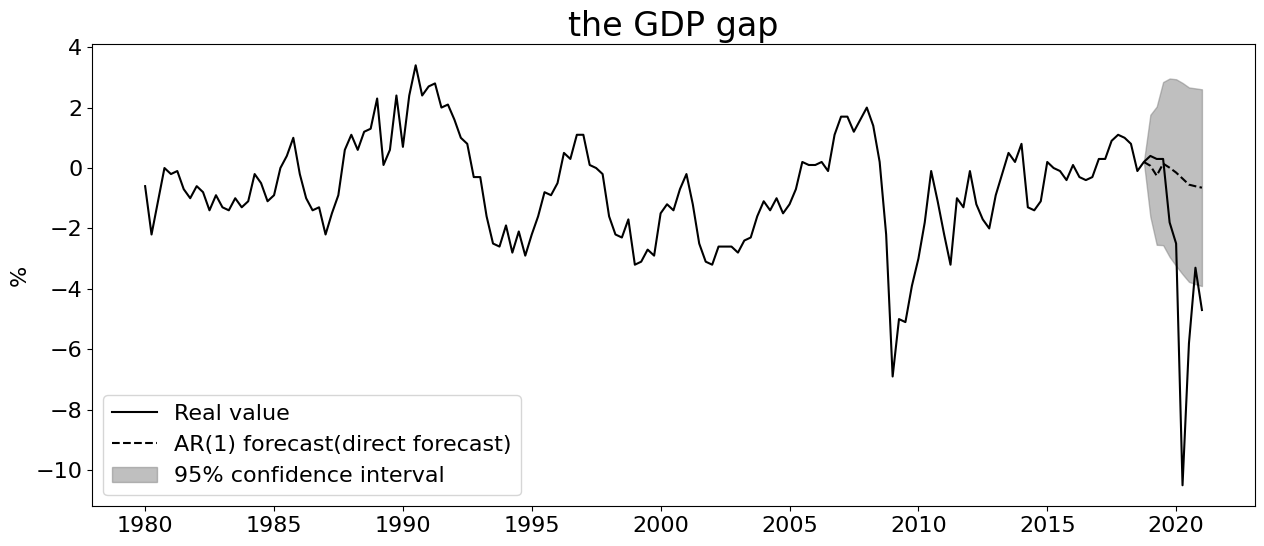

In [14]:
#####
# Draw the graph
plt.title("the GDP gap", fontsize=24)
plt.plot(dti, caogap, label="Real value", color="black")
plt.plot(
    dti[ssize - 1 : ssize + MAX_H],
    ar_forecast[ssize - 1 : ssize + MAX_H, :],
    label="AR(1) forecast (direct forecast)",
    color="black",
    linestyle="dashed",
)
plt.fill_between(
    np.ravel(dti[ssize - 1 : ssize + MAX_H]),
    np.ravel(ar_ubound[ssize - 1 : ssize + MAX_H, :]),
    np.ravel(ar_lbound[ssize - 1 : ssize + MAX_H, :]),
    color="grey",
    alpha=0.5,
    label="95% confidence interval",
)
plt.legend(loc="lower left", fontsize=16)
plt.tick_params(labelsize=16)
plt.ylabel("%", fontsize=16)

The AIC and BIC in Table 1.2 can be calculated with the following codes.

In [17]:
# Code 1.8
# Choose the lag order of the AR model for the GDP gap
def get_aic_bic(caogap, y, y_hat, param1, param2):
    sse = ((y - y_hat) ** 2).sum(axis=0)
    aic = math.log(sse / (len(caogap) - param1)) + (l + 1) * 2 / (len(caogap) - param2)
    bic = math.log(sse / (len(caogap) - param1)) + (l + 1) * math.log(
        (len(caogap) - param2)
    ) / (len(caogap) - param2)
    return aic, bic


MAX_L = 4  # The maximum lag order of AR model（4 quarters）
aic_result, bic_result = np.zeros([MAX_L + 1, 3]), np.zeros([MAX_L + 1, 3])
# The case of AR(0) model
l = 0
# Calculation of AIC・BIC <Method 1> : Adjusting the sample sizes of all the AR models to the same
y = pd.DataFrame(caogap[MAX_L:])
aic_result[l, 0], bic_result[l, 0] = get_aic_bic(caogap, y, np.mean(y.to_numpy()), MAX_L, MAX_L)
# Calculation of AIC・BIC <Method 2> : Adjusting the sample sizes of all the AR models to the same
#（Adjusting the degrees of freedom of sample variance ）
y = pd.DataFrame(caogap[MAX_L:])
aic_result[l, 1], bic_result[l, 1] = get_aic_bic(
    caogap, y, np.mean(y.to_numpy()), MAX_L + l + 1, MAX_L
)
# Calculation of AIC・BIC <Method 3> : Use all available observations in the respective AR model
y = pd.DataFrame(caogap[l:])
aic_result[l, 2], bic_result[l, 2] = get_aic_bic(caogap, y, np.mean(y.to_numpy()), l, l)

# The case of AR(p) model（p>0）
for l in range(1, MAX_L + 1):
    # Calculation of AIC・BIC <Method 1> : Adjusting the sample sizes of all the AR models to the same
    x, y = pd.DataFrame(), pd.DataFrame(caogap[MAX_L:])
    for ll in range(1, l + 1):
        x_lagged = pd.DataFrame(caogap[MAX_L - ll : MAX_L - ll + len(y)].to_numpy())
        x = pd.concat([x, x_lagged], axis=1)
    model = LinearRegression()
    model.fit(x, y)
    aic_result[l, 0], bic_result[l, 0] = get_aic_bic(caogap, y, model.predict(x), MAX_L, MAX_L)

    # Calculation of AIC・BIC <Method 2> : Adjusting the sample sizes of all the AR models to the same
    #（Adjusting the degrees of freedom of sample variance of error term）
    x, y = pd.DataFrame(), pd.DataFrame(caogap[MAX_L:])
    for ll in range(1, l + 1):
        x_lagged = pd.DataFrame(caogap[MAX_L - ll : MAX_L - ll + len(y)].to_numpy())
        x = pd.concat([x, x_lagged], axis=1)
    model = LinearRegression()
    model.fit(x, y)
    aic_result[l, 1], bic_result[l, 1] = get_aic_bic(
        caogap, y, model.predict(x), MAX_L + l + 1, MAX_L
    )

    # Calculation of AIC・BIC <Method 3> : Use all available observations in the respective AR model
    x, y = pd.DataFrame(), pd.DataFrame(caogap[l:])
    for ll in range(1, l + 1):
        x_lagged = pd.DataFrame(caogap[l - ll : l - ll + len(y)].to_numpy())
        x = pd.concat([x, x_lagged], axis=1)
    model = LinearRegression()
    model.fit(x, y)
    aic_result[l, 2], bic_result[l, 2] = get_aic_bic(caogap, y, model.predict(x), l, l)

# Creat the results table
df_aic_result = pd.DataFrame(
    aic_result,
    columns=[f"Method{i+1}" for i in range(3)],
    index=[f"L={i}" for i in range(MAX_L + 1)],
)
df_bic_result = pd.DataFrame(
    bic_result,
    columns=[f"Method{i+1}" for i in range(3)],
    index=[f"L={i}" for i in range(MAX_L + 1)],
)
print("[AIC]\n", df_aic_result)
print("[BIC]\n", df_bic_result)
print("[best AIC lag length]\n", df_aic_result.idxmin())
print("[best BIC lag length]\n", df_bic_result.idxmin())

[AIC]
       Method1   Method2   Method3
L=0  1.254979  1.261210  1.235055
L=1  0.237441  0.249941  0.239595
L=2  0.249859  0.268668  0.246264
L=3  0.259668  0.284826  0.259438
L=4  0.263083  0.294631  0.263083
[BIC]
       Method1   Method2   Method3
L=0  1.274118  1.280349  1.253879
L=1  0.275719  0.288219  0.277398
L=2  0.307276  0.326086  0.303205
L=3  0.336224  0.361383  0.335675
L=4  0.358779  0.390327  0.358779
[best AIC lag length]
 Method1    L=1
Method2    L=1
Method3    L=1
dtype: object
[best BIC lag length]
 Method1    L=1
Method2    L=1
Method3    L=1
dtype: object


The modified Q-test for the residual series in Table 1.3 can be calculated with the following code. Note that Table 1.3 calculates the case of the AR(1) model, but the lag order of the AR model can be adjusted by changing the value of "L" in the code. 

In [18]:
# Code1.9
# The Q-test, modified Q-test of the error term of AR(1) model
L = 1  # Lag order of AR model
M = 8  # Order of serial correlation
model = sm.tsa.AutoReg(caogap, lags=L)
result = model.fit()
pred = result.predict()
resid = caogap[L:] - pred
dlen = len(resid)
rho_lag = np.zeros(M)
q_bp, q_lb, crit_temp, crit = np.zeros(M), np.zeros(M), np.zeros(M), np.zeros(M)
for i in range(1, M + 1):
    data_x, data_y = pd.DataFrame(resid[L : dlen - i]), pd.DataFrame(resid[L + i :])
    model_lag = LinearRegression(fit_intercept=True)
    model_lag.fit(data_x, data_y)
    rho_lag[i - 1] = model_lag.coef_
    # Q-test statistic
    q_bp[i - 1] = dlen * sum(rho_lag**2)
    # modified Q-test statistic
    q_lb[i - 1] = dlen * (dlen + 2) * sum(rho_lag**2 / (dlen - i))
    #  critical value of chi-square distribution
    crit_temp[i - 1] = sp.stats.chi2.ppf(q=0.95, df=i)
crit[L:] = crit_temp[:M-L]
crit[:L] ="nan"

# Creat the results table
df_table = pd.DataFrame(
    [rho_lag, q_bp, q_lb, crit],
    columns=[f"m={i+1}" for i in range(M)],
    index=["correlation coefficient", "Q_BP", "Q_LB", "critical value"],
)
print(df_table)

                              m=1       m=2       m=3       m=4       m=5  \
correlation coefficient  0.002727  0.034127  0.049545 -0.068339 -0.014500   
Q_BP                     0.001227  0.193391  0.598415  1.369011  1.403702   
Q_LB                     0.001250  0.198137  0.616884  1.420030  1.465114   
critical value                NaN  3.841459  5.991465  7.814728  9.487729   

                               m=6        m=7        m=8  
correlation coefficient   0.006427  -0.019003  -0.058635  
Q_BP                      1.410517   1.470100   2.037388  
Q_LB                      1.481486   1.553840   2.167158  
critical value           11.070498  12.591587  14.067140  


The direct forecast of the AR(p) model in Figure 1.5 can be calculated with the following code.

In [19]:
# Code 1.10
# Forecast and forecast error by AR(p) model 
MAX_L = 4  # Maximum lag order of AR model（4 quarters）
MAX_H = 9  #  Maximum forecast horizon（9 quarters）
CONFIDENCE_LEVEL = 0.95  # Confidence coefficient

# Estimate the AR model using data from 1980 to 2018
ssize = sum(dti.year < 2019)
lbound, ubound = sp.stats.norm.interval(alpha=CONFIDENCE_LEVEL, loc=0, scale=1)
# Sample size
nsample = len(caogap)
# Lag order selected by AIC and BIC
best_aic_lag, best_bic_lag = np.zeros(MAX_H), np.zeros(MAX_H)
best_aic_predict, best_bic_predict = np.zeros(MAX_H), np.zeros(MAX_H)
best_aic_conf, best_bic_conf = np.zeros(MAX_H), np.zeros(MAX_H)
for h in range(MAX_H):
    predict_result, conf_result, aic_result, bic_result = (
        np.zeros(MAX_L),
        np.zeros(MAX_L),
        np.zeros(MAX_L),
        np.zeros(MAX_L),
    )
    for l in range(1, MAX_L + 1):
        train_x, train_y = pd.DataFrame(), pd.DataFrame(caogap[MAX_L + h : ssize])
        test_x = pd.DataFrame()
        for ll in range(1, l + 1):
            train_x_lagged = pd.DataFrame(
                caogap[MAX_L - ll : MAX_L - ll + len(train_y)].to_numpy()
            )
            train_x = pd.concat([train_x, train_x_lagged], axis=1)
        for ll in range(1, l + 1):
            test_x_lagged = pd.DataFrame(
                caogap[
                    ssize + l - ll - (l - 1) - h - 1 : ssize + l - ll - (l - 1) - h
                ].to_numpy()
            )
            test_x = pd.concat([test_x, test_x_lagged], axis=1)
        # Estimation of AR model
        model = LinearRegression()
        model.fit(train_x, train_y)
        y_hat = model.predict(train_x)
        se = np.std(train_y.to_numpy() - y_hat)
        sse = ((train_y[MAX_L - l :] - y_hat[MAX_L - l :]) ** 2).sum(axis=0)
        aic = math.log(sse / len(train_y)) + (l + 1) * 2 / len(train_y)
        bic = math.log(sse / len(train_y)) + (l + 1) * math.log(len(train_y)) / len(
            train_y
        )
        forecast = model.predict(test_x)
        conf_result[l - 1], aic_result[l - 1], bic_result[l - 1], predict_result[l - 1] = (
            se * ubound,
            aic,
            bic,
            forecast,
        )
    best_aic_lag[h], best_bic_lag[h] = (pd.DataFrame(aic_result)).idxmin() + 1, (
        pd.DataFrame(bic_result)
    ).idxmin() + 1
    best_aic_predict[h], best_bic_predict[h] = (
        predict_result[(pd.DataFrame(aic_result)).idxmin()],
        predict_result[(pd.DataFrame(bic_result)).idxmin()],
    )
    best_aic_conf[h], best_bic_conf[h] = (
        conf_result[(pd.DataFrame(aic_result)).idxmin()],
        conf_result[(pd.DataFrame(bic_result)).idxmin()],
    )

ar_forecast1 = (
    pd.concat([caogap[0:ssize], pd.DataFrame(best_aic_predict)], axis=0)
).to_numpy()
ar_bound1 = (
    pd.concat([pd.DataFrame(np.zeros(ssize)), pd.DataFrame(best_aic_conf)], axis=0)
).to_numpy()
ar_ubound1, ar_lbound1 = ar_forecast1 + ar_bound1, ar_forecast1 - ar_bound1

ar_forecast2 = (
    pd.concat([caogap[0:ssize], pd.DataFrame(best_bic_predict)], axis=0)
).to_numpy()
ar_bound2 = (
    pd.concat([pd.DataFrame(np.zeros(ssize)), pd.DataFrame(best_bic_conf)], axis=0)
).to_numpy()
ar_ubound2, ar_lbound2 = ar_forecast2 + ar_bound2, ar_forecast2 - ar_bound2

/var/folders/v2/qnyptv01769_67q119kq30hh0000gn/T/ipykernel_1427/2097787124.py:9: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  lbound, ubound = sp.stats.norm.interval(alpha=CONFIDENCE_LEVEL, loc=0, scale=1)


(0.0, 5.0)

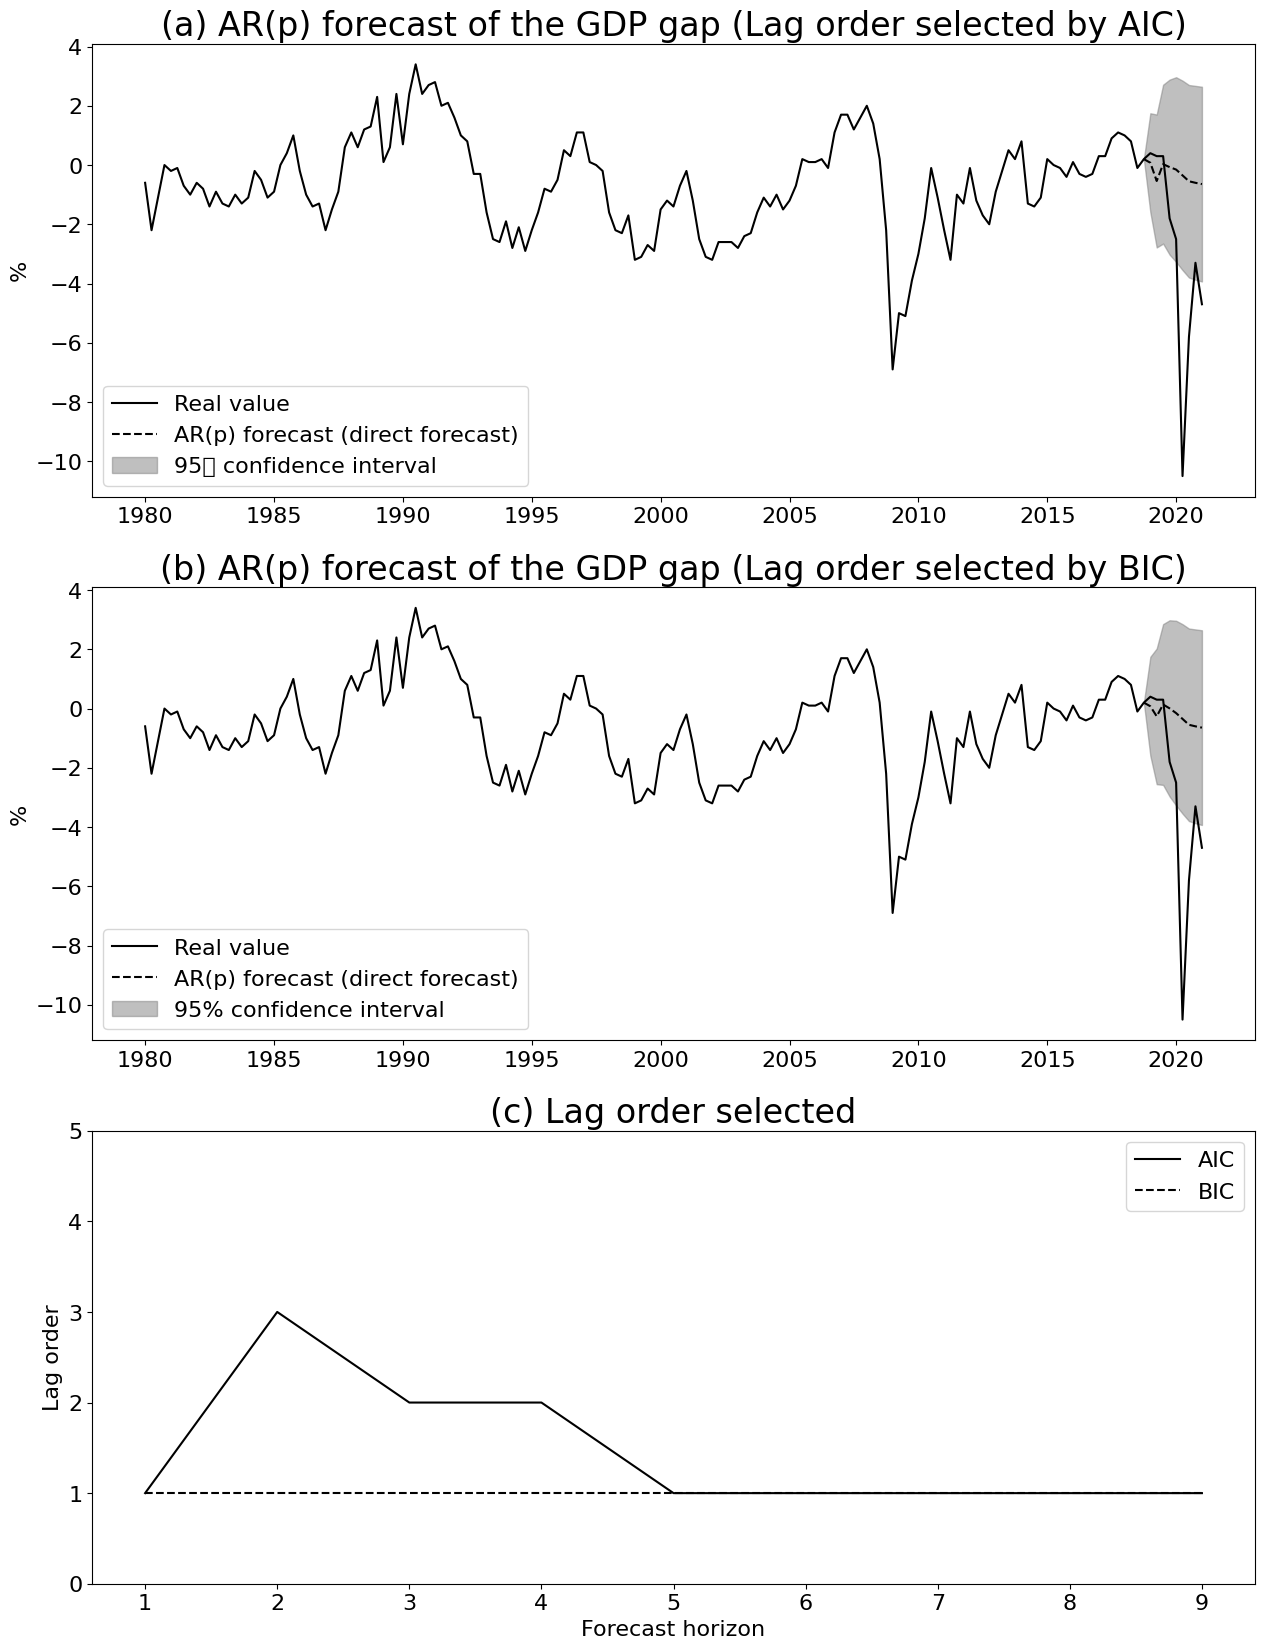

In [24]:
#####
# Draw the graph
fig = plt.figure(figsize=(15, 20))
ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)
ax1.set_title("(a) AR(p) forecast of the GDP gap (Lag order selected by AIC)", fontsize=24)
ax1.plot(dti, caogap, label="Real value", color="black")
ax1.plot(
    dti[ssize - 1 : ssize + MAX_H],
    ar_forecast1[ssize - 1 : ssize + MAX_H, :],
    label="AR(p) forecast (direct forecast)",
    color="black",
    linestyle="dashed",
)
ax1.fill_between(
    np.ravel(dti[ssize - 1 : ssize + MAX_H]),
    np.ravel(ar_ubound1[ssize - 1 : ssize + MAX_H, :]),
    np.ravel(ar_lbound1[ssize - 1 : ssize + MAX_H, :]),
    color="grey",
    alpha=0.5,
    label="95％ confidence interval",
)
ax1.legend(loc="lower left", fontsize=16)
ax1.tick_params(labelsize=16)
ax1.set_ylabel("%", fontsize=16)
ax2.set_title("(b) AR(p) forecast of the GDP gap (Lag order selected by BIC)", fontsize=24)
ax2.plot(dti, caogap, label="Real value", color="black")
ax2.plot(
    dti[ssize - 1 : ssize + MAX_H],
    ar_forecast2[ssize - 1 : ssize + MAX_H, :],
    label="AR(p) forecast (direct forecast)",
    color="black",
    linestyle="dashed",
)
ax2.fill_between(
    np.ravel(dti[ssize - 1 : ssize + MAX_H]),
    np.ravel(ar_ubound2[ssize - 1 : ssize + MAX_H, :]),
    np.ravel(ar_lbound2[ssize - 1 : ssize + MAX_H, :]),
    color="grey",
    alpha=0.5,
    label="95% confidence interval",
)
ax2.legend(loc="lower left", fontsize=16)
ax2.tick_params(labelsize=16)
ax2.set_ylabel("%", fontsize=16)
ax3.set_title("(c) Lag order selected", fontsize=24)
ax3.plot(
    pd.DataFrame(x for x in range(1, MAX_H + 1)).to_numpy(),
    pd.DataFrame(best_aic_lag).to_numpy(),
    label="AIC",
    color="black")
ax3.plot(
    pd.DataFrame(x for x in range(1, MAX_H + 1)).to_numpy(),
    pd.DataFrame(best_bic_lag).to_numpy(),
    label="BIC",
    color="black",
    linestyle="dashed",
)
ax3.legend(loc="upper right", fontsize=16)
ax3.tick_params(labelsize=16)
ax3.set_xlabel("Forecast horizon", fontsize=16)
ax3.set_ylabel("Lag order", fontsize=16)
ax3.set_ylim(0, MAX_L + 1)